<a href="https://colab.research.google.com/github/vasanthk99/Data_Science_Project/blob/main/supermarket_sales_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas, numpy
import os
from IPython.display import display, HTML
import datetime, calendar
from plotly import express
import plotly.graph_objects as go
import matplotlib.pyplot as slspl, seaborn as sestk
from sklearn import metrics, decomposition, utils, model_selection, pipeline,preprocessing, feature_selection
from sklearn import ensemble, tree, svm, neural_network, linear_model

import pickle

In [2]:
SlsDf=pandas.read_csv("/content/Amazon Sale Report.csv")
SlsDf.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
def ClnCov(sls):
    print("==========================================")
    print("      Data Infomation")
    print("==========================================")
    print(sls.info())
    print("===================================================")
    print("Missing Values Before Cleaning")
    print("===================================================")
    print(sls.isnull().sum())
    smcov=sum(sls.isnull().sum())
    if smcov>0:
        covob=sls.dtypes[sls.dtypes=='object'].index.tolist()
        covnm=sls.dtypes[sls.dtypes!='object'].index.tolist()
        if sum(sls.isna().sum())!=0:
            for x in covob:
                sls[x]=sls[x].fillna(sls[x].mode()[0])
            for y in covnm:
                sls[y]=sls[y].fillna(sls[y].mean())
        print("===================================================")
        print("      Missing Values (After Cleaning)")
        print("===================================================")
        print(sls.isnull().sum())
    else:
        print("===================================================")
        print("      Data has no Missing Values ")
        print("===================================================")
    return sls
SlsDfMS=ClnCov(SlsDf)

      Data Infomation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76897 entries, 0 to 76896
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               76897 non-null  int64  
 1   Order ID            76897 non-null  object 
 2   Date                76896 non-null  object 
 3   Status              76896 non-null  object 
 4   Fulfilment          76896 non-null  object 
 5   Sales Channel       76896 non-null  object 
 6   ship-service-level  76896 non-null  object 
 7   Style               76896 non-null  object 
 8   SKU                 76896 non-null  object 
 9   Category            76896 non-null  object 
 10  Size                76896 non-null  object 
 11  ASIN                76896 non-null  object 
 12  Courier Status      72393 non-null  object 
 13  Qty                 76896 non-null  float64
 14  currency            72307 non-null  object 
 15  Amount              72307 non-n

In [4]:
def CovDates(sls):
    sldf="Date"
    slmn=[]
    for x in range(1,13):
        slmn.append(calendar.month_name[x])
    dts_sls=sls[sldf].tolist()
    slmn,slmn1=[],[]
    dates_sls=[]
    year_sls=[]
    idx_months=[]
    new_features=['Year','Days','Month(Num)','Months']
    for d in dts_sls:
        spl=d.split("-")
        year_sls.append(int("20"+spl[2]))
        slmn.append(int(spl[0]))
        slmn1.append(calendar.month_name[int(spl[0])])
        dates_sls.append(int(spl[1]))
    for m in slmn:
        idx_months.append(slmn[m-1])
    try:
        sls.insert(1,new_features[0],numpy.array(year_sls,str))
        sls.insert(2,new_features[1],dates_sls)
        sls.insert(3,new_features[2],idx_months)
        sls.insert(4,new_features[3],slmn1)
    except:
        pass
    #sls=sls.drop('Date',axis=1)
    return sls
SlsDfNew=CovDates(SlsDfMS)
SlsDfNew.head()

,index,Year,Days,Month(Num),Months,Order ID,Date,Status,Fulfilment,Sales Channel,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,2022,30,4,April,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
1,1,2022,30,4,April,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
2,2,2022,30,4,April,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Easy Ship,False
3,3,2022,30,4,April,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
4,4,2022,30,4,April,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False


EDA


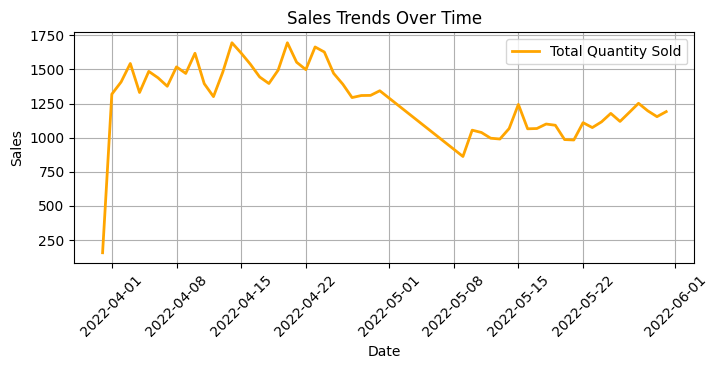

In [5]:
SlsDfNew['Date'] = pandas.to_datetime(SlsDfNew['Date'])
daily_sales = SlsDfNew.groupby('Date').agg(total_qty=('Qty', 'sum'), total_amount=('Amount', 'sum')).reset_index()
slspl.figure(figsize=(8, 3))
sestk.lineplot(data=daily_sales, x='Date', y='total_qty', label='Total Quantity Sold', color='orange', linewidth=2)
slspl.title('Sales Trends Over Time')
slspl.xlabel('Date')
slspl.ylabel('Sales')
slspl.xticks(rotation=45)
slspl.legend()
slspl.grid(True)
slspl.show()

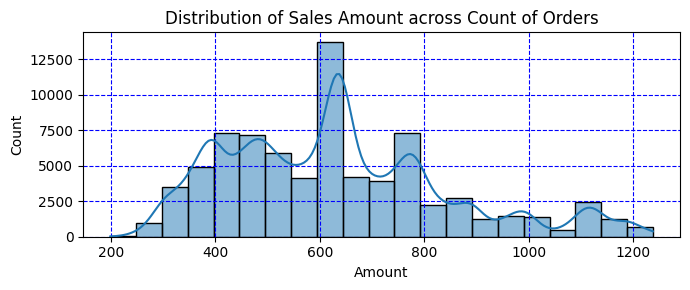

In [6]:
RangeIntQ = SlsDfNew['Amount'].quantile(0.75) - SlsDfNew['Amount'].quantile(0.25)
UB = SlsDfNew['Amount'].quantile(0.75) + 1.5*RangeIntQ
LB = SlsDfNew['Amount'].quantile(0.25) - 1.5*RangeIntQ

ValMdn = SlsDfNew['Amount'].median()
SlsDfNew['Amount'] = SlsDfNew['Amount'].apply(lambda x: ValMdn if x > UB  or x < LB else x)
SlsDfNew['Amount'] = SlsDfNew['Amount'].apply(lambda x: ValMdn if x == 0 else x)

fig, my_ax = slspl.subplots(figsize=(7,3))

sestk.histplot(data = SlsDfNew['Amount'], ax=my_ax, binwidth=50, kde=True)
slspl.grid(linestyle='--',color='b')
slspl.title("Distribution of Sales Amount across Count of Orders")
slspl.tight_layout()

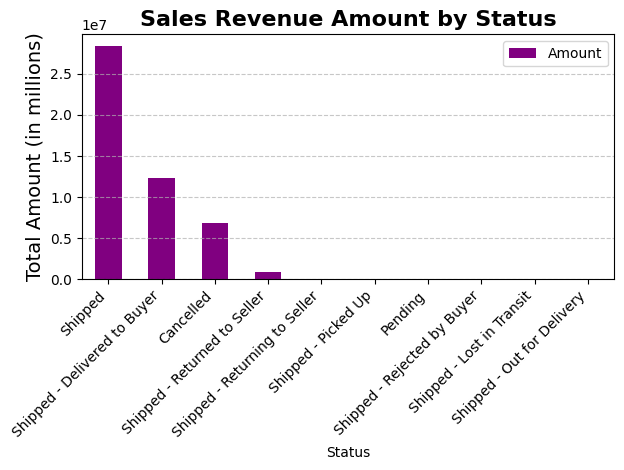

,Amount
Status,
Shipped,2.840364e+07
Shipped - Delivered to Buyer,1.227249e+07
Cancelled,6.883933e+06
Shipped - Returned to Seller,9.156793e+05
Shipped - Returning to Seller,1.194400e+04
Shipped - Picked Up,5.040000e+03
Pending,3.880163e+03
Shipped - Rejected by Buyer,3.396000e+03
Shipped - Lost in Transit,3.247000e+03


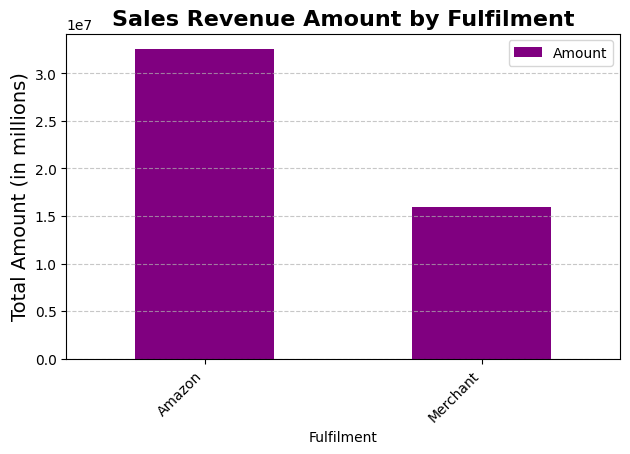

,Amount
Fulfilment,
Amazon,3.254752e+07
Merchant,1.595752e+07


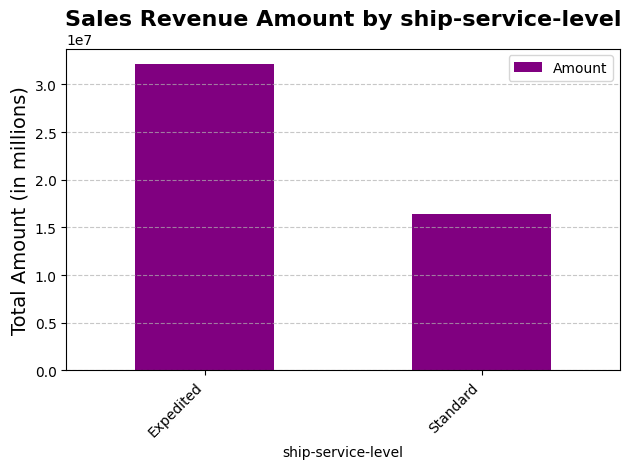

,Amount
ship-service-level,
Expedited,3.215355e+07
Standard,1.635149e+07


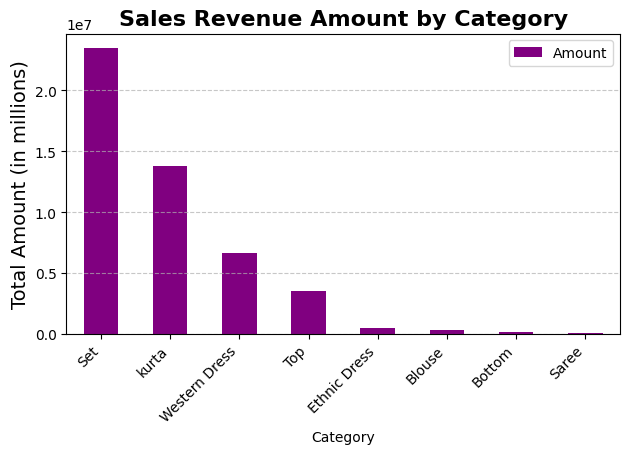

,Amount
Category,
Set,2.350240e+07
kurta,1.378394e+07
Western Dress,6.661190e+06
Top,3.520508e+06
Ethnic Dress,4.965642e+05
Blouse,3.414281e+05
Bottom,1.181185e+05
Saree,8.089905e+04


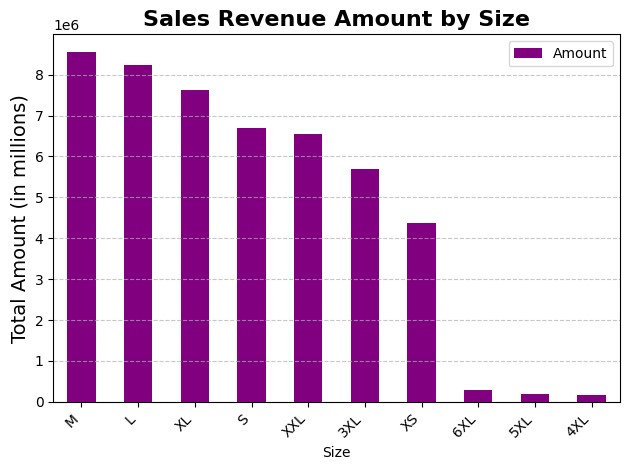

,Amount
Size,
M,8.557508e+06
L,8.226383e+06
XL,7.612411e+06
S,6.689171e+06
XXL,6.559537e+06
3XL,5.691927e+06
XS,4.369558e+06
6XL,2.856586e+05
5XL,2.007779e+05


In [7]:
fetssls=['Status','Fulfilment','ship-service-level','Category','Size']
for f in range(len(fetssls)):
    SlsTops=SlsDfNew.groupby(fetssls[f])['Amount'].sum().to_frame().sort_values(by=['Amount'],ascending=False).head(10)
    SlsTops.plot(kind='bar',color='#800080')
    slspl.title('Sales Revenue Amount by {}'.format(fetssls[f]), fontsize=16, weight='bold')
    slspl.ylabel('Total Amount (in millions)', fontsize=14)
    slspl.grid(True, axis='y', linestyle='--', alpha=0.7)
    slspl.xticks(rotation=45, ha="right")
    slspl.legend()
    slspl.tight_layout()
    slspl.show()
    display(HTML(SlsTops.to_html()))

FEATURE ENCODING

In [8]:
def DataEnc(sls):
    sls1=sls.copy()
    print("Feature Types Before Encoding")
    print(sls1.info())
    obsls=sls1.dtypes[sls1.dtypes=='object'].index.tolist()
    numsls=sls1.dtypes[sls1.dtypes!='object'].index.tolist()
    sls_objdf=sls1[obsls]
    sls_numdf=sls1[numsls]
    cols = sls_objdf.columns.tolist()
    sls_objdf[cols] = sls_objdf[cols].apply(preprocessing.LabelEncoder().fit_transform)
    sls1=pandas.concat([sls_numdf,sls_objdf],axis=1)
    if "Unnamed: 22" in sls1.columns:
        sls1=sls1.drop("Unnamed: 22",axis=1)
    print("Feature Types After Encoding")
    print(sls1.info())
    return sls1
SlsDfNew_encoded=DataEnc(SlsDfNew)
SlsDfNew_encoded.head()

Feature Types Before Encoding
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76897 entries, 0 to 76896
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               76897 non-null  int64         
 1   Year                76897 non-null  object        
 2   Days                76897 non-null  int64         
 3   Month(Num)          76897 non-null  int64         
 4   Months              76897 non-null  object        
 5   Order ID            76897 non-null  object        
 6   Date                76897 non-null  datetime64[ns]
 7   Status              76897 non-null  object        
 8   Fulfilment          76897 non-null  object        
 9   Sales Channel       76897 non-null  object        
 10  ship-service-level  76897 non-null  object        
 11  Style               76897 non-null  object        
 12  SKU                 76897 non-null  object        
 13  Category        

,index,Days,Month(Num),Date,Qty,Amount,ship-postal-code,B2B,Year,Months,...,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by
0,0,30,4,2022-04-30,0.0,647.62,400081.0,False,0,0,...,4,7,5171,1,0,3597,28,0,2950,0
1,1,30,4,2022-04-30,1.0,406.00,560085.0,False,0,0,...,7,0,4901,1,0,577,23,0,586,0
2,2,30,4,2022-04-30,1.0,329.00,410210.0,True,0,0,...,7,8,609,1,0,4012,28,0,2950,0
3,3,30,4,2022-04-30,0.0,753.33,605008.0,False,0,0,...,6,5,4305,1,0,4620,39,0,2950,0
4,4,30,4,2022-04-30,1.0,574.00,600073.0,False,0,0,...,5,0,4030,1,0,1091,51,0,2950,0


OUTLIER DETECTION

In [9]:
def OutVarSales(sls,v1):
    arrsls=numpy.array(sls.iloc[:,:-1])
    slspca = decomposition.PCA(n_components=2)
    slspca.fit(arrsls)
    explval=slspca.explained_variance_ratio_
    valm=max(explval.tolist())
    print(explval)
    cmp_slspca=["Comp-{}".format(i+1) for i in range(len(explval.tolist()))]
    slspl.figure(figsize=(5,3))
    valml="%.3f" % valm
    slspl.title("PCA Variance (Max: {})".format(max(explval.tolist())),fontsize=16)
    slspl.bar(cmp_slspca,explval.tolist(),width=0.5,color=v1)
    slspl.plot(explval.tolist(),"--yD")
    slspl.xlabel("Components",fontsize=14)
    slspl.ylabel("PCA Variance",fontsize=14)
    slspl.grid()
    slspl.show()
    return explval
def DataSalScl(sls):
    SCLMM = preprocessing.MinMaxScaler()
    slsscl=SCLMM.fit_transform(sls)
    return slsscl

[0.97566464 0.01285435]


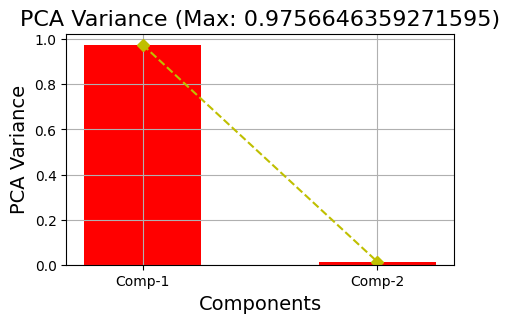

[0.30580439 0.18568473]


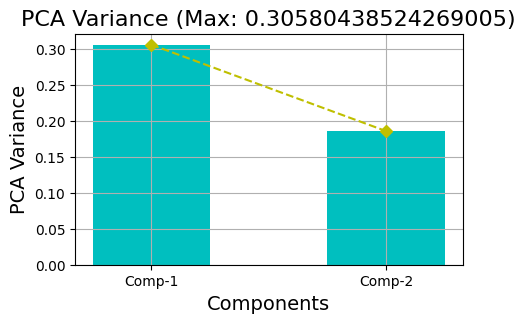

,index,Days,Month(Num),Qty,ship-postal-code,B2B,Year,Months,Order ID,Status,...,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Amount
0,0.000000,0.966667,0.0,0.000000,0.329675,0.0,0.0,0.0,0.585532,0.000000,...,0.7,0.791157,0.5,0.0,0.541309,0.459016,0.0,0.995613,0.0,647.62000
1,0.000013,0.966667,0.0,0.066667,0.511519,0.0,0.0,0.0,0.113630,0.333333,...,0.0,0.749847,0.5,0.0,0.086832,0.377049,0.0,0.197773,0.0,406.00000
2,0.000026,0.966667,0.0,0.066667,0.341187,1.0,0.0,0.0,0.377394,0.222222,...,0.8,0.093176,0.5,0.0,0.603762,0.459016,0.0,0.995613,0.0,329.00000
3,0.000039,0.966667,0.0,0.000000,0.562574,0.0,0.0,0.0,0.364089,0.000000,...,0.5,0.658660,0.5,0.0,0.695260,0.639344,0.0,0.995613,0.0,753.33000
4,0.000052,0.966667,0.0,0.066667,0.556965,0.0,0.0,0.0,0.747551,0.222222,...,0.0,0.616585,0.5,0.0,0.164184,0.836066,0.0,0.995613,0.0,574.00000
5,0.000065,0.966667,0.0,0.066667,0.103536,0.0,0.0,0.0,0.386690,0.222222,...,0.8,0.413556,0.5,0.0,0.279910,0.885246,0.0,0.995613,0.0,824.00000
6,0.000078,0.966667,0.0,0.066667,0.056865,0.0,0.0,0.0,0.938739,0.222222,...,0.5,0.235006,0.5,0.0,0.158014,0.163934,0.0,0.995613,0.0,653.00000
7,0.000091,0.966667,0.0,0.066667,0.443269,0.0,0.0,0.0,0.706288,0.333333,...,0.7,0.106181,0.5,0.0,0.325809,0.852459,0.0,0.233210,0.0,399.00000
8,0.000104,0.966667,0.0,0.000000,0.443242,0.0,0.0,0.0,0.799530,0.000000,...,0.0,0.263770,0.0,0.0,0.325809,0.852459,0.0,0.995613,0.0,643.16279
9,0.000117,0.966667,0.0,0.066667,0.556929,0.0,0.0,0.0,0.177271,0.222222,...,1.0,0.203029,0.5,0.0,0.190820,0.836066,0.0,0.995613,0.0,363.00000


In [10]:
vramnt=[]
vramnt.append(OutVarSales(SlsDfNew_encoded.drop(['Date','Amount'],axis=1),"r"))

FlagVar=[]
for vr in vramnt:
    for v in vr:
        if v>0.8:
            FlagVar.append(True)
if len(FlagVar)==1 and True in FlagVar:
    NrmSls=DataSalScl(SlsDfNew_encoded.drop(['Date','Amount'],axis=1))
NrmSls=pandas.DataFrame(NrmSls,columns=SlsDfNew_encoded.drop(['Date','Amount'],axis=1).columns.tolist())
NrmSls['Amount']=SlsDfNew_encoded['Amount'].tolist()
OutVarSales(NrmSls.drop('Amount',axis=1),"c")
NrmSls.head(10)

FEATURE SELECTION

In [11]:
def Func1(sls,nmst):
    secl="plasma"
    plst=len(sls)
    ttl_text="Correlation for {}".format(nmst)
    '''grpstk.figure(figsize=(14,8))
    grpstk.title(ttl_text,fontsize=25,color="b")
    sestk.heatmap(sls.corr(),fmt="0.2f",cmap=secl,annot=True).
    grpstk.show()'''
    corralldata=pandas.DataFrame(sls.corr()['Amount'])
    corralldata=corralldata.fillna(corralldata.mean())
    feats=corralldata.index.tolist()
    corralldata['Features']=feats
    corralldata.columns=["Coeff","Features"]
    corralldata=corralldata.reset_index(drop=True)
    slscorr=corralldata[(corralldata['Coeff']>0.01)|(corralldata['Coeff']>-0.01)].reset_index(drop=True)
    print("Selected Features Using Correlation: \n",*slscorr.Features.tolist(),sep="\n")
    print("---------------------------------------------------")
    print("     Total Features Selected Using Correlation: {}".format(len(slscorr.Features.tolist())))
    print("---------------------------------------------------")
    return slscorr.Features.tolist()
CorrSel=Func1(NrmSls, "Amazon Sales")

Selected Features Using Correlation: 

index
Days
Month(Num)
Qty
B2B
Year
Months
Order ID
Status
Sales Channel 
Style
SKU
ASIN
Courier Status
currency
ship-city
ship-country
promotion-ids
fulfilled-by
Amount
---------------------------------------------------
     Total Features Selected Using Correlation: 20
---------------------------------------------------


In [12]:
pred_sls=NrmSls.drop(['Amount'],axis=1)
target_sls=NrmSls['Amount']
pred_sls1=pred_sls
MdRecurr=feature_selection.RFE(estimator=linear_model.LinearRegression(), verbose=1,
                               n_features_to_select=int(len(pred_sls.columns)*0.9),step=0.3)
MdRecurr.fit(pred_sls, target_sls)
print(MdRecurr.ranking_)
MdRecurr.feature_names_in_    #[MdRecurr.support_==True]
rankdf=pandas.DataFrame({"Features":MdRecurr.feature_names_in_,"Rank":MdRecurr.ranking_})
rankdf1=rankdf[rankdf['Rank']==1]
print("Selected Features Using RFE: \n",*rankdf1.Features,sep="\n")
print("--------------------------------------------------------------")
print("---------------------------------------------------")
print("     Total Features Selected Using RFE: {}".format(len(rankdf1.Features)))
print("---------------------------------------------------")
RFESel=rankdf1.Features.tolist()

Fitting estimator with 25 features.
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2]
Selected Features Using RFE: 

index
Days
Month(Num)
Qty
ship-postal-code
B2B
Year
Months
Order ID
Status
Fulfilment
Sales Channel 
ship-service-level
Style
SKU
Category
Size
ASIN
Courier Status
ship-city
ship-state
promotion-ids
--------------------------------------------------------------
---------------------------------------------------
     Total Features Selected Using RFE: 22
---------------------------------------------------


In [13]:
Features_Sales=[]
for ff in RFESel:
    if ff in CorrSel:
        Features_Sales.append(ff)

print("Selected Features Using Hybrid Approach (RFE+Correlation): {}".format(len(Features_Sales)))


Selected Features Using Hybrid Approach (RFE+Correlation): 16


In [14]:
NrmSls1=utils.resample(NrmSls,replace = True, n_samples = int(len(NrmSls)*1.5), random_state = 10).reset_index(drop=True)
SlsPred=NrmSls1[Features_Sales]
SlsPred

,index,Days,Month(Num),Qty,B2B,Year,Months,Order ID,Status,Sales Channel,Style,SKU,ASIN,Courier Status,ship-city,promotion-ids
0,0.656679,0.966667,0.0,0.066667,0.0,0.0,1.0,0.164022,0.222222,0.0,0.723207,0.730511,0.484853,0.5,0.086832,0.995613
1,0.121879,0.766667,0.0,0.066667,0.0,0.0,0.0,0.667724,0.333333,0.0,0.532768,0.506879,0.408813,0.5,0.164184,0.213635
2,0.132660,0.766667,0.0,0.066667,0.0,0.0,0.0,0.504968,0.222222,0.0,0.823439,0.793030,0.119798,0.5,0.308954,0.995613
3,0.488933,0.233333,0.0,0.066667,0.0,0.0,0.0,0.594230,0.222222,0.0,0.910563,0.885050,0.599755,0.5,0.325809,0.995613
4,0.232834,0.633333,0.0,0.066667,0.0,0.0,0.0,0.077614,0.222222,0.0,0.286045,0.257566,0.566707,0.5,0.691497,0.995613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115340,0.670191,0.966667,0.0,0.066667,0.0,0.0,1.0,0.511106,0.333333,0.0,0.276793,0.246255,0.663403,0.5,0.355907,0.009450
115341,0.769325,0.766667,0.0,0.066667,0.0,0.0,1.0,0.455981,0.222222,0.0,0.133385,0.091104,0.226744,0.5,0.608728,0.995613
115342,0.997438,0.266667,0.0,0.066667,0.0,0.0,1.0,0.782649,0.222222,0.0,0.884348,0.855549,0.308140,0.5,0.164184,0.995613
115343,0.297649,0.500000,0.0,0.000000,0.0,0.0,0.0,0.995380,0.000000,0.0,0.717039,0.723020,0.486995,0.0,0.086832,0.995613


In [15]:
SlsAmount=NrmSls1['Amount']
SlsAmount

,Amount
0,537.00000
1,345.00000
2,788.00000
3,625.00000
4,597.00000
...,...
115340,885.00000
115341,568.00000
115342,579.00000
115343,643.16279


Data Segmentation


In [16]:
def SegmentData(prd,tr):
    TrainSlsX,TestSlsX,TrainSlsY,TestSlsY=model_selection.train_test_split(prd,tr, test_size=0.25, random_state=10)
    return TrainSlsX,TestSlsX,TrainSlsY,TestSlsY

TrainSlsX,TestSlsX,TrainSlsY,TestSlsY=SegmentData(SlsPred,SlsAmount)

Function for Sales Prediction

In [17]:
def SalesPredFunc(rgmd, XSLTR, XSLTS, YSLTR, YSLTS, mdl_pres_sls):
    mdl_pres_sls=rgmd
    mdl_pres_sls.fit(XSLTR, YSLTR)
    prdCov=mdl_pres_sls.predict(XSLTS)
    prdCov_tr=mdl_pres_sls.predict(XSLTR)
    mse=metrics.mean_squared_error(YSLTS,prdCov,squared=True)
    r2nf=round(metrics.r2_score(YSLTS,prdCov),4)*100
    r2nftr=round(metrics.r2_score(YSLTR,prdCov_tr),4)*100
    mapenf=metrics.mean_absolute_percentage_error(YSLTS,prdCov)
    return r2nf,r2nftr,mse,mapenf

## Assigning Models with Default Settings

In [18]:
ModelSales=[
    tree.DecisionTreeRegressor(),
    linear_model.LinearRegression(),
    svm.LinearSVR(),
    ensemble.RandomForestRegressor(min_weight_fraction_leaf=0.001),
    neural_network.MLPRegressor()
]
ModelNmSales=[
   "Decision Tree",
    "Linear Regression",
    "Support Vector Regression",
    "Random Forest",
    "MLP Regression"
]
print(*ModelSales,sep="\n")

DecisionTreeRegressor()
LinearRegression()
LinearSVR()
RandomForestRegressor(min_weight_fraction_leaf=0.001)
MLPRegressor()


In [19]:
!pip install --upgrade scikit-learn

In [20]:
def SalesPredFunc(rgmd, XSLTR, XSLTS, YSLTR, YSLTS, mdl_pres_sls):
    mdl_pres_sls=rgmd
    mdl_pres_sls.fit(XSLTR, YSLTR)
    prdCov=mdl_pres_sls.predict(XSLTS)
    prdCov_tr=mdl_pres_sls.predict(XSLTR)
    # Remove the 'squared' argument or update scikit-learn
    mse=metrics.mean_squared_error(YSLTS,prdCov) # Remove squared=True
    r2nf=round(metrics.r2_score(YSLTS,prdCov),4)*100
    r2nftr=round(metrics.r2_score(YSLTR,prdCov_tr),4)*100
    mapenf=metrics.mean_absolute_percentage_error(YSLTS,prdCov)
    return r2nf,r2nftr,mse,mapenf

## Sales Prediction with Models with Default Settings

In [21]:
DataSalesPred=[[],[],[],[],[],[]]
for i in range(len(ModelSales)):
    Strt_T = datetime.datetime.now()
    print("Executing {}".format(ModelNmSales[i]))
    PrdCv=SalesPredFunc(ModelSales[i], TrainSlsX, TestSlsX, TrainSlsY, TestSlsY, ModelNmSales[i])
    DataSalesPred[0].append(PrdCv[0])
    DataSalesPred[1].append(PrdCv[1])
    DataSalesPred[2].append(PrdCv[2])
    DataSalesPred[3].append(PrdCv[3])
    EndT = datetime.datetime.now()
    DfTime = EndT-Strt_T
    TimeSec=DfTime.total_seconds()
    DataSalesPred[4].append(round(TimeSec,3))
    print("Elasped Time: {} Seconds".format(round(TimeSec,3)))
    print("______________________________________")

Executing Decision Tree
Elasped Time: 0.742 Seconds
______________________________________
Executing Linear Regression
Elasped Time: 0.03 Seconds
______________________________________
Executing Support Vector Regression
Elasped Time: 0.108 Seconds
______________________________________
Executing Random Forest
Elasped Time: 37.851 Seconds
______________________________________
Executing MLP Regression
Elasped Time: 76.657 Seconds
______________________________________


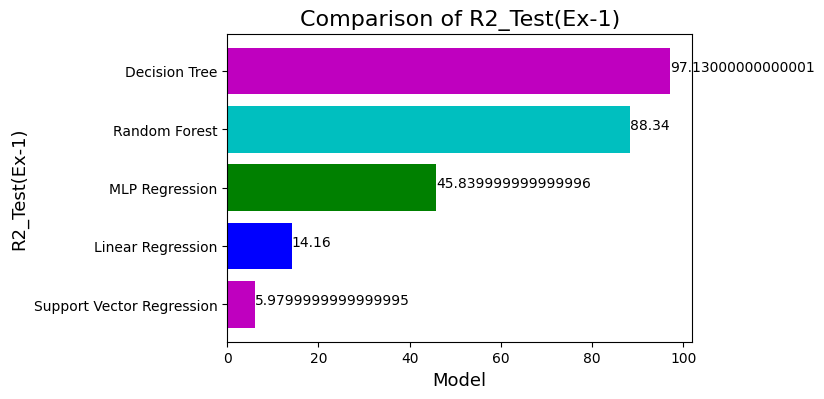

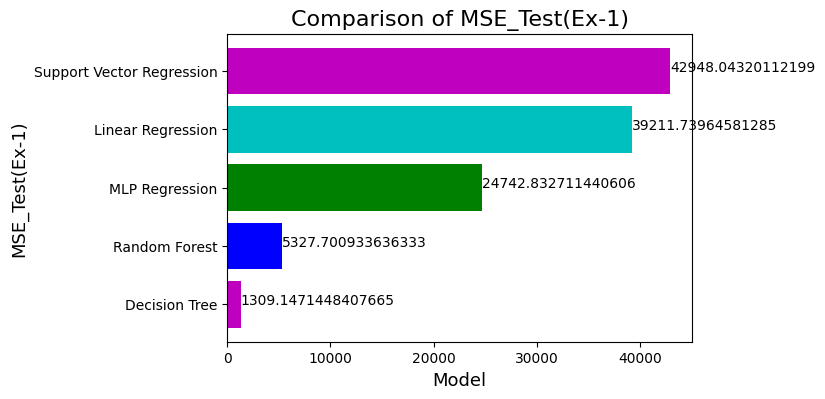

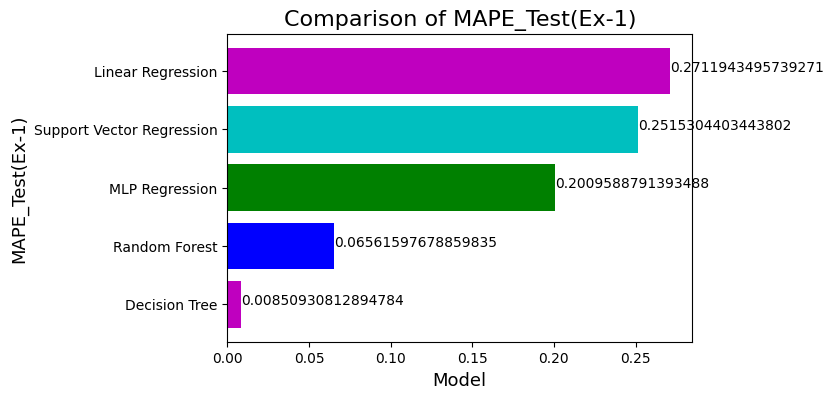

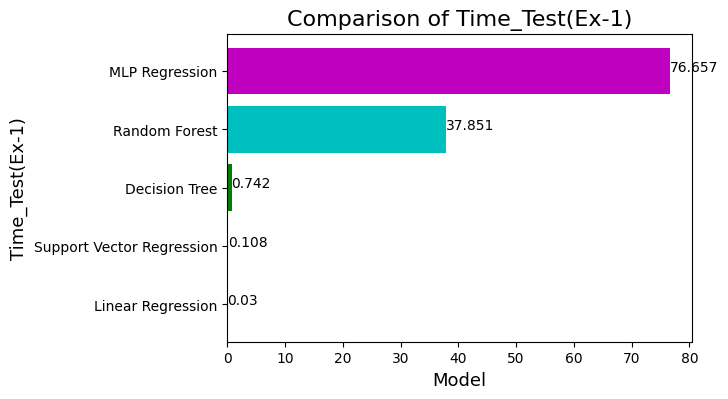

,Model,R2_Train(Ex-1),R2_Test(Ex-1),MSE_Test(Ex-1),MAPE_Test(Ex-1),Time_Test(Ex-1)
0,Decision Tree,100.00,97.13,1309.147145,0.008509,0.742
1,Random Forest,89.14,88.34,5327.700934,0.065616,37.851
2,MLP Regression,46.00,45.84,24742.832711,0.200959,76.657
3,Linear Regression,14.48,14.16,39211.739646,0.271194,0.030
4,Support Vector Regression,6.36,5.98,42948.043201,0.251530,0.108


In [22]:
PredSalesDF=pandas.DataFrame({
    "Model":ModelNmSales,
    "R2_Train(Ex-1)":DataSalesPred[1],
    "R2_Test(Ex-1)":DataSalesPred[0],
    "MSE_Test(Ex-1)":DataSalesPred[2],
    "MAPE_Test(Ex-1)":DataSalesPred[3],
    "Time_Test(Ex-1)":DataSalesPred[4]
})
PredSalesDF

clnf_all_lst=PredSalesDF.columns.tolist()[2:]
for i in clnf_all_lst:
    PredSalesDF=PredSalesDF.sort_values(by=i,ascending=True)
    slspl.figure(figsize=(6,4))
    slspl.title("Comparison of {}".format(i),fontsize=16)
    slspl.barh(PredSalesDF['Model'],PredSalesDF[i],color=["m","b","g","c"])
    slspl.xlabel("Model",fontsize=13)
    slspl.ylabel("{}".format(i),fontsize=13)
    for gid, vlgl in enumerate(PredSalesDF[i]):
        slspl.text(vlgl, gid, str(vlgl))
    slspl.show()
PredSalesDF=PredSalesDF.sort_values(by='R2_Test(Ex-1)',ascending=False).reset_index(drop=True)
PredSalesDF.to_csv("SalesPredictionEx1.csv")
PredSalesDF

## Model Tuning

In [23]:
ModelSales1=[
    tree.DecisionTreeRegressor(),
    linear_model.LinearRegression(),
    svm.LinearSVR(),
    ensemble.RandomForestRegressor(),
    neural_network.MLPRegressor()
]
TunedModelSales=ModelSales1.copy()
HypTunes=[
    [{"max_depth":[50,60,70],"splitter":["best", "random"]}],
    [{"fit_intercept":[False,True]}],
    [{'tol': [0.01,0.001,0.0001,0.00001],'C':[0.2,0.4,0.6,0.8,1.0],"max_iter":[500,1000,1500]}],
    [{"n_estimators":[50,100],"max_depth":[50,60,70]}],
    [{'solver':['lbfgs','adam'],"alpha":[0.001,0.0001,0.00001],'tol': [0.001,0.0001,0.00001]}]
]
params_tuned, time_tuned= [], []
rgmdls=[
    'DTR.sav',
    'LR.sav',
    'SVR.sav',
    'RFR.sav',
    'MLPR.sav'
]
dirfiles=os.listdir(os.getcwd())
if 'DTR.sav' in dirfiles and 'LR.sav' in dirfiles and 'SVR.sav' in dirfiles and 'RFR.sav' in dirfiles and 'MLPR.sav' in dirfiles:
    print("-----------------------------------------------------")
    print("   Tuned Models are Loading Now ...\n   Loading Model Files")
    print("-----------------------------------------------------")
    rg1=pickle.load(open(rgmdls[0], 'rb'))
    rg2=pickle.load(open(rgmdls[1], 'rb'))
    rg3=pickle.load(open(rgmdls[2], 'rb'))
    rg4=pickle.load(open(rgmdls[3], 'rb'))
    rg5=pickle.load(open(rgmdls[4], 'rb'))
    TunedModelSales=[rg1,rg2,rg3,rg4,rg5]
    print(*TunedModelSales, sep="\n")
else:
    for c in range(len(TunedModelSales)):
        print("____________________________________________________")
        print("Tuning {}".format(ModelNmSales[c]))
        print("____________________________________________________")
        t1 = datetime.datetime.now()
        SlsGrdSrch = model_selection.GridSearchCV(TunedModelSales[c], HypTunes[c], cv = 5, scoring='r2')
        SlsGrdSrch.fit(TrainSlsX, TrainSlsY)
        TunedModelSales[c]=SlsGrdSrch.best_estimator_
        t2 = datetime.datetime.now()
        delta = t2 - t1
        ElapsedTime=delta.total_seconds()
        print("Time Taken for Tuning '{}': {} Seconds".format(ModelNmSales[c],ElapsedTime))
        print("____________________________________________________")
        print("{} Tuning Complete".format(ModelNmSales[c]))
        print("____________________________________________________")
        params_tuned.append(SlsGrdSrch.best_estimator_)
        time_tuned.append(ElapsedTime)
    for hm in range(len(TunedModelSales)):
        pickle.dump(TunedModelSales[hm], open(rgmdls[hm], 'wb'))
    TuningData=pandas.DataFrame({"Classifier":ModelNmSales,"Tuned_Parameters":params_tuned,"Tuning_Time(Sec)":time_tuned})
    #display(HTML(TuningData.to_html()))

____________________________________________________
Tuning Decision Tree
____________________________________________________
Time Taken for Tuning 'Decision Tree': 11.06288 Seconds
____________________________________________________
Decision Tree Tuning Complete
____________________________________________________
____________________________________________________
Tuning Linear Regression
____________________________________________________
Time Taken for Tuning 'Linear Regression': 0.285384 Seconds
____________________________________________________
Linear Regression Tuning Complete
____________________________________________________
____________________________________________________
Tuning Support Vector Regression
____________________________________________________
Time Taken for Tuning 'Support Vector Regression': 14.323833 Seconds
____________________________________________________
Support Vector Regression Tuning Complete
_______________________________________________

In [24]:
HybSt=ensemble.StackingRegressor(estimators=[
              ('Model-1', TunedModelSales[0]),
              ('Model-2',TunedModelSales[3])],
              final_estimator=TunedModelSales[3])
HybVt=ensemble.VotingRegressor(estimators=[
              ('Model-1', TunedModelSales[0]),
              ('Model-2',TunedModelSales[3])])


In [25]:
HybSt

StackingRegressor(estimators=[('Model-1', DecisionTreeRegressor(max_depth=70)),
                              ('Model-2', RandomForestRegressor(max_depth=70))],
                  final_estimator=RandomForestRegressor(max_depth=70))

In [26]:
HybVt

VotingRegressor(estimators=[('Model-1', DecisionTreeRegressor(max_depth=70)),
                            ('Model-2', RandomForestRegressor(max_depth=70))])

In [27]:
ModelSalesAll=ModelSales.copy()
HybAll=[HybSt, HybVt]
HybNmAll=["Stacking Hybrid","Voting Hybrid"]
if len(ModelSalesAll)==5 and len(ModelNmSales)==5:
    ModelSalesAll.extend(HybAll)
    ModelNmSales.extend(HybNmAll)
else:
    ModelSalesAll=ModelSalesAll[:5]
    ModelNmSales=ModelNmSales[:5]
    ModelSalesAll.extend(HybAll)
    ModelNmSales.extend(HybNmAll)
print(*ModelSalesAll, sep="\n")
print("\n")
print(*ModelNmSales, sep="\n")

DecisionTreeRegressor()
LinearRegression()
LinearSVR()
RandomForestRegressor(min_weight_fraction_leaf=0.001)
MLPRegressor()
StackingRegressor(estimators=[('Model-1', DecisionTreeRegressor(max_depth=70)),
                              ('Model-2', RandomForestRegressor(max_depth=70))],
                  final_estimator=RandomForestRegressor(max_depth=70))
VotingRegressor(estimators=[('Model-1', DecisionTreeRegressor(max_depth=70)),
                            ('Model-2', RandomForestRegressor(max_depth=70))])


Decision Tree
Linear Regression
Support Vector Regression
Random Forest
MLP Regression
Stacking Hybrid
Voting Hybrid


In [28]:
DataSalesPredEx2=[[],[],[],[],[]]
for i in range(len(ModelSalesAll)):
    Strt_T = datetime.datetime.now()
    print("Executing {}".format(ModelNmSales[i]))
    PrdCv=SalesPredFunc(ModelSalesAll[i], TrainSlsX, TestSlsX, TrainSlsY, TestSlsY, ModelNmSales[i])
    DataSalesPredEx2[0].append(PrdCv[0])
    DataSalesPredEx2[1].append(PrdCv[1])
    DataSalesPredEx2[2].append(PrdCv[2])
    DataSalesPredEx2[3].append(PrdCv[3])
    EndT = datetime.datetime.now()
    DfTime = EndT-Strt_T
    TimeSec=DfTime.total_seconds()
    DataSalesPredEx2[4].append(round(TimeSec,3))
    print("Elasped Time: {} Seconds".format(round(TimeSec,3)))
    print("______________________________________")

Executing Decision Tree
Elasped Time: 0.712 Seconds
______________________________________
Executing Linear Regression
Elasped Time: 0.024 Seconds
______________________________________
Executing Support Vector Regression
Elasped Time: 0.061 Seconds
______________________________________
Executing Random Forest
Elasped Time: 37.305 Seconds
______________________________________
Executing MLP Regression
Elasped Time: 59.656 Seconds
______________________________________
Executing Stacking Hybrid
Elasped Time: 247.754 Seconds
______________________________________
Executing Voting Hybrid
Elasped Time: 48.459 Seconds
______________________________________


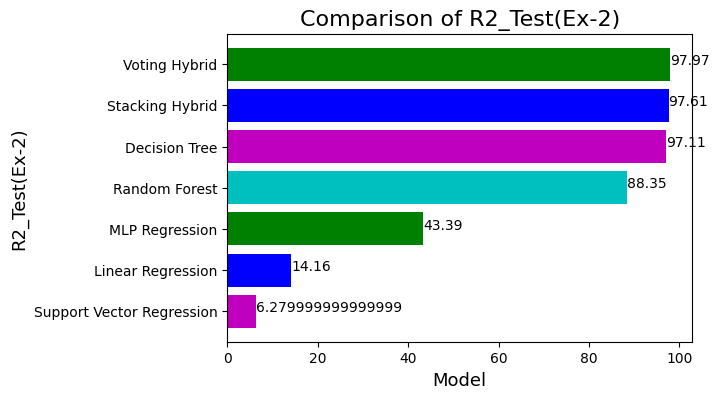

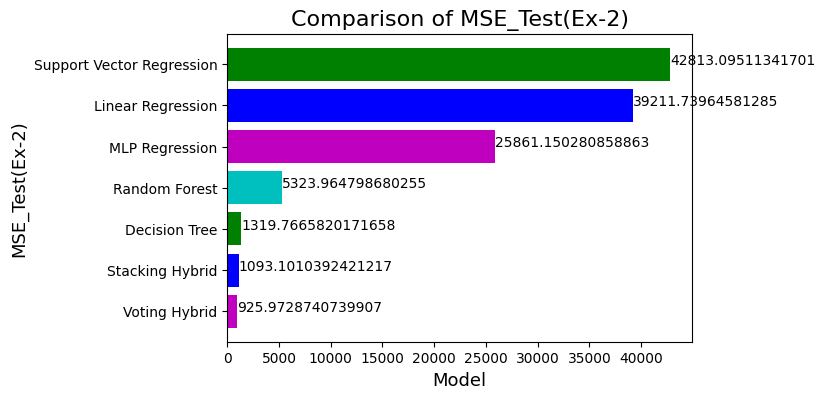

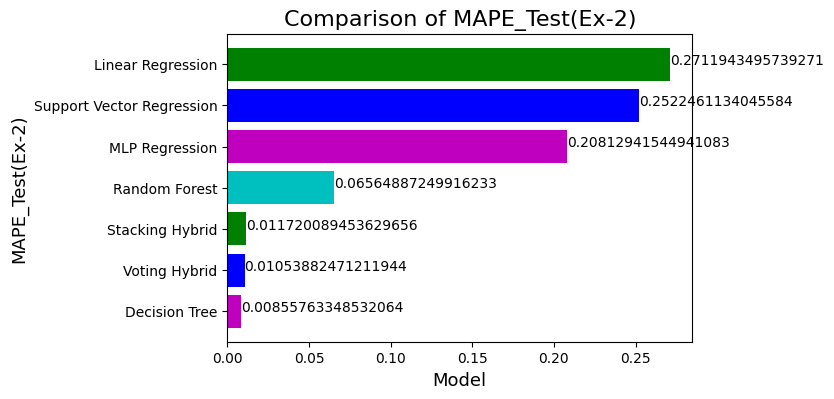

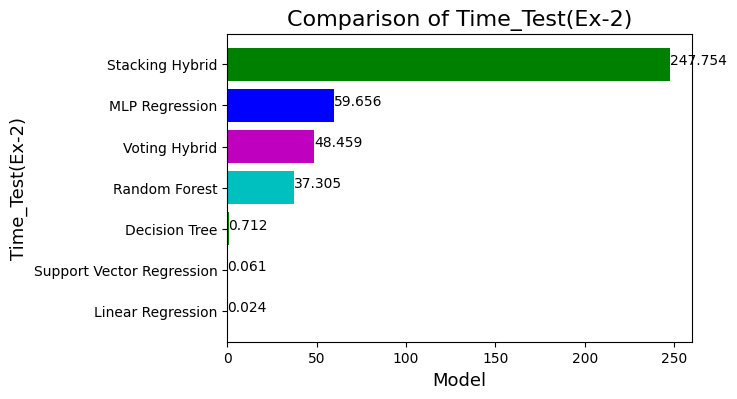

,Model,R2_Train(Ex-2),R2_Test(Ex-2),MSE_Test(Ex-2),MAPE_Test(Ex-2),Time_Test(Ex-2)
0,Voting Hybrid,99.93,97.97,925.972874,0.010539,48.459
1,Stacking Hybrid,99.55,97.61,1093.101039,0.011720,247.754
2,Decision Tree,100.00,97.11,1319.766582,0.008558,0.712
3,Random Forest,89.12,88.35,5323.964799,0.065649,37.305
4,MLP Regression,43.52,43.39,25861.150281,0.208129,59.656
5,Linear Regression,14.48,14.16,39211.739646,0.271194,0.024
6,Support Vector Regression,6.66,6.28,42813.095113,0.252246,0.061


In [29]:
PredSalesDFEx2=pandas.DataFrame({
    "Model":ModelNmSales,
    "R2_Train(Ex-2)":DataSalesPredEx2[1],
    "R2_Test(Ex-2)":DataSalesPredEx2[0],
    "MSE_Test(Ex-2)":DataSalesPredEx2[2],
    "MAPE_Test(Ex-2)":DataSalesPredEx2[3],
    "Time_Test(Ex-2)":DataSalesPredEx2[4]
})

clnf_all_lst=PredSalesDFEx2.columns.tolist()[2:]
for i in clnf_all_lst:
    PredSalesDFEx2=PredSalesDFEx2.sort_values(by=i,ascending=True)
    slspl.figure(figsize=(6,4))
    slspl.title("Comparison of {}".format(i),fontsize=16)
    slspl.barh(PredSalesDFEx2['Model'],PredSalesDFEx2[i],color=["m","b","g","c"])
    slspl.xlabel("Model",fontsize=13)
    slspl.ylabel("{}".format(i),fontsize=13)
    for gid, vlgl in enumerate(PredSalesDFEx2[i]):
        slspl.text(vlgl, gid, str(vlgl))
    slspl.show()
PredSalesDFEx2=PredSalesDFEx2.sort_values(by='R2_Test(Ex-2)',ascending=False).reset_index(drop=True)
PredSalesDFEx2.to_csv("SalesPredictionEx2.csv")
PredSalesDFEx2

In [30]:
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 21.1 MB/s eta 0:00:00


In [31]:
import warnings
warnings.filterwarnings("ignore")
import pandas, numpy
import os
from IPython.display import display, HTML
import datetime, calendar
from plotly import express
import plotly.graph_objects as go
import matplotlib.pyplot as slspl, seaborn as sestk
from sklearn import metrics, decomposition, utils, model_selection, pipeline,preprocessing, feature_selection
from sklearn import ensemble, tree, svm, neural_network, linear_model
from statsmodels.tsa.arima.model import ARIMA
import pickle
from statsmodels.tsa.stattools import adfuller

In [33]:
SalesFRDt=SlsDfMS[['Date','Amount']]
SalesFRDt.columns=['Date','Amount']
SalesFRDt=SalesFRDt.sort_values(by='Date').reset_index(drop=True)
SalesFRDt

,Date,Amount
0,2022-03-31,499.0
1,2022-03-31,449.0
2,2022-03-31,727.0
3,2022-03-31,364.0
4,2022-03-31,280.0
...,...,...
76892,2022-05-31,469.0
76893,2022-05-31,475.0
76894,2022-05-31,690.0
76895,2022-05-31,999.0


In [34]:
SalesFRDtPrep=SalesFRDt.groupby(["Date"]).agg({"Amount": [numpy.mean]}).sort_values(by=("Amount","mean"),ascending=False)
SalesFRDtPrep['Date']=SalesFRDtPrep.index
SalesFRDtPrep=SalesFRDtPrep.reset_index(drop=True)
SalesFRDtPrep=SalesFRDtPrep.sort_values(by='Date').reset_index(drop=True)
SalesFRDtPrep.columns=['Amount','Date']
#SalesFRDtPrep['Date'] = pandas.to_datetime(SalesFRDtPrep['Date'].dt.strftime('%m-%d-%Y'))
# The 'Date' column is already datetime objects, so we only need to format them correctly
SalesFRDtPrep['Date'] = SalesFRDtPrep['Date'].dt.strftime('%m-%d-%Y') # Convert to string with desired format
SalesFRDtPrep['Date'] = pandas.to_datetime(SalesFRDtPrep['Date'], format='%m-%d-%Y') # Convert back to datetime
SalesFRDtPrep

,Amount,Date
0,612.756229,2022-03-31
1,625.819171,2022-04-01
2,619.215207,2022-04-02
3,625.224421,2022-04-03
4,631.337907,2022-04-04
5,614.849925,2022-04-05
6,596.878466,2022-04-06
7,615.284555,2022-04-07
8,631.274680,2022-04-08
9,630.267631,2022-04-09


In [35]:
SalesFRDtPrepdt=SalesFRDtPrep.set_index("Date")
SalesFRDtPrepdt=SalesFRDtPrepdt.resample('1D').mean().ffill()
SalesFRDtPrepdt

,Amount
Date,
2022-03-31,612.756229
2022-04-01,625.819171
2022-04-02,619.215207
2022-04-03,625.224421
2022-04-04,631.337907
...,...
2022-05-27,652.439264
2022-05-28,642.877968
2022-05-29,649.196127


<Axes: title={'center': 'Sales Amounts'}, xlabel='Date'>

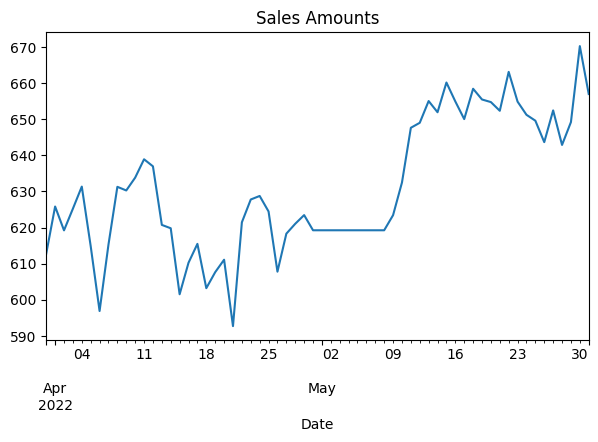

In [36]:
SalesFRDtPrepdt['Amount'].plot(kind='line', title="Sales Amounts", figsize=(7,4))

In [37]:
print("Observations of Dickey-fuller test")
ADFSales = adfuller(SalesFRDtPrepdt['Amount'],autolag='AIC')
ResSlsADF=pandas.Series(ADFSales[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in ADFSales[4].items():
    ResSlsADF['critical value (%s)'%key]= value
print(ResSlsADF)
testval=ResSlsADF[0]
critval=ResSlsADF[4]
if testval<critval:
    print("\nData is Stationary")
else:
    print("\nData is not Stationary")

Observations of Dickey-fuller test
Test Statistic                 -1.962976
p-value                         0.303039
#lags used                      0.000000
number of observations used    61.000000
critical value (1%)            -3.542413
critical value (5%)            -2.910236
critical value (10%)           -2.592745
dtype: float64

Data is not Stationary


In [38]:
def DiffSlsAmnt(Slsdt, interval=1):
    if interval > len(Slsdt):
        raise ValueError("Interval must not exceed the length of the sales data.")

    df_vals = list()
    for i in range(interval, len(Slsdt)):
        value = Slsdt[i] - Slsdt[i - interval]
        df_vals.append(value)
    dfsls = numpy.array(df_vals)
    return dfsls

def DiffSlsInvAmnt(slshsval, hist_y, interval=1):
    return hist_y + slshsval[-interval]

In [54]:
FrcstFet='Amount'
FrSlsDt=SalesFRDtPrepdt.copy()
X = FrSlsDt[FrcstFet].values
YrDays = 30
DffSlsVl = DiffSlsAmnt(X, YrDays)
SlsARIMA = ARIMA(DffSlsVl, order=(7,0,1))
SlsARIMA_fit = SlsARIMA.fit()
initvl = len(DffSlsVl)
flag=True
while flag==True:
    try:
        usip=int(input("Days to Forecast Cases: "))
        flag=False
    except:
        print("Please Enter Correct Input")
        flag=True
lstval = initvl + (usip-1)
SlsPredFr = SlsARIMA_fit.predict(start=initvl, end=lstval)
HstAmnt = [x for x in X]
InvLstAmnt=[]
day = 1
for yHistoryValue in SlsPredFr:
    inv_value = DiffSlsInvAmnt(HstAmnt, yHistoryValue, YrDays)
    HstAmnt.append(inv_value)
    InvLstAmnt.append(inv_value)
    day += 1

DtsFrcsAll=[]
for i in range(usip):
    DtsFrcsAll.append(FrSlsDt.index[-1]+datetime.timedelta(days=i))
SlsARIMA_fit.summary()

Days to Forecast Cases: 60


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:                 ARIMA(7, 0, 1)   Log Likelihood                -125.746
Date:                Sun, 29 Dec 2024   AIC                            271.491
Time:                        15:31:42   BIC                            286.149
Sample:                             0   HQIC                           276.350
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3320     13.652      1.709      0.087      -3.426      50.090
ar.L1          0.5541      3.346      0.166      0.868      -6.004       7.112
ar.L2          0.0128      2.670      0.005      0.996      -5.220       5.246
ar.L3          0.3018      0.569      0.531      0.596      -0.813       1.417
ar.L4         -0.0452      1.360     -0.033      0.974      -2.710       2.620
ar.L5          0.0246      0.718      0.034      0.973      -1.383       1.432
ar.L6          0.0308      0.307      0.100      0.920      -0.571       0.633
ar.L7         -0.1318      0.270     -0.489      0.625      -0.660       0.397
ma.L1          0.2453      3.421      0.072      0.943      -6.459       6.949
sigma2       145.2190     67.824      2.141      0.032      12.286     278.152
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.37
Prob(Q):                              0.90   Prob(JB):                         0.31
Heteroskedasticity (H):               0.83   Skew:                             0.66
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
FrcsSlsFinDt=pandas.DataFrame({"Date":DtsFrcsAll,"Forecasted Values":InvLstAmnt})
FrcsSlsFinDt.to_csv("Forecast_1_year_{}.csv")
dates=FrSlsDt.index.tolist()
FrcsSlsFinDt1=FrcsSlsFinDt.copy()
fore_date=FrcsSlsFinDt1.Date.tolist()
FrcsSlsFinDt1=FrcsSlsFinDt1.drop('Date',axis=1)
alldate=dates+fore_date
arimadf=pandas.DataFrame({"Date":alldate,"Forecast":HstAmnt})
FrcsSlsFinDt2=FrcsSlsFinDt.copy()
FrcsSlsFinDt2=FrcsSlsFinDt2.drop('Date',axis=1)
FrcsSlsFinDt2.index=fore_date
FrcsSlsFinDt2

,Forecasted Values
2022-05-31,650.591664
2022-06-01,654.085492
2022-06-02,650.741399
2022-06-03,649.968180
2022-06-04,650.776562
2022-06-05,646.153706
2022-06-06,645.157026
2022-06-07,649.875830
2022-06-08,657.178480
2022-06-09,671.739854


In [56]:
slsvs=go.Figure()
slsvs.add_trace(go.Scatter(x=SalesFRDtPrep['Date'], y=SalesFRDtPrep[FrcstFet], mode='lines',name="Actual Values"))
slsvs.add_trace(go.Scatter(x=FrcsSlsFinDt2.index, y=FrcsSlsFinDt2["Forecasted Values"], mode='lines',name="Forecasted".format(FrcstFet),))
slsvs.update_layout(title="Temperature Change Forecasting for ({})Days".format(usip),xaxis_title="Date",yaxis_title=FrcstFet,legend=dict(x=0,y=1,traceorder="normal"),font=dict(size=12))
slsvs.show()